In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
warnings.filterwarnings("ignore")
logging.getLogger().setLevel(logging.CRITICAL)
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

In [3]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Si2s' : 0.339, 'Si2p' : 0.339, 'Cl2p' : 0.891})

# Analysis experiments on Quartz from september 2020

## Read processed experiments

In [4]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_*/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if (' ' not in f) and ('/proc' in f) :
        files_new.append(f)
        
files = files_new
files[5], files[6] = files[6], files[5]
files

['/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_10min_2.1V.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_20min_2.1V.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min_BaCl2_2min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210130_3-quartz_FBI_subl_60min_BaCl2_6min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_cleane.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_02_09_quartz/proc/20210209_4-quartz_FBI_subl_60min.sxy',
 '/Users/

In [5]:
fbi_exps = []
ba_exps = []
for f in files:
    if ('FBI_subl_' in f) and ('BaCl2' not in f):
        fbi_exps.append(read_processed_xp(f))
    elif 'BaCl2' in f:
        ba_exps.append(read_processed_xp(f))

clean_exps = []
for f in files:
    if 'clean' in f:
        clean_exps.append(read_processed_xp(f))

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_10min_2.1V.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_20min_2.1V.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min_BaCl2_2min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210130_3-quartz_FBI_subl_60min_BaCl2_6min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '

In [6]:
[xp.name for xp in clean_exps]

['2-quartz_clean', '3-quartz_cleane', '4-quartz_clean2', '2-fusedSi_clean']

In [7]:
[xp.name for xp in fbi_exps]

['2-quartz_FBI_subl_10min_2.1V',
 '2-quartz_FBI_subl_20min_2.1V',
 '3-quartz_FBI_subl_60min',
 '4-quartz_FBI_subl_60min',
 '1-fusedSi_FBI_subl_60min',
 '2-fusedSi_FBI_subl_60min']

In [8]:
[xp.name for xp in ba_exps]

['3-quartz_FBI_subl_60min_BaCl2_2min',
 '3-quartz_FBI_subl_60min_BaCl2_6min',
 '4-quartz_FBI_subl_60min_BaCl2_6min',
 '4-quartz_FBI_subl_60min_BaCl2_6min_air9h',
 '4-quartz_FBI_subl_60min_BaCl2_6min_air30h',
 '2-fusedSi_FBI_subl_60min_BaCl2_6min']

In [71]:
samp12 = [clean_exps[3], fbi_exps[4], fbi_exps[5], ba_exps[5]]
samp3 = [clean_exps[1], fbi_exps[2], ba_exps[0], ba_exps[1]]
samp4 = [clean_exps[2], fbi_exps[3], ba_exps[2], ba_exps[3], ba_exps[4]]

## Show individual plots

In [10]:
regions= ['N1s', 'C1s', 'O1s', 'Ba3d', 'Cl2p', 'Si2p']

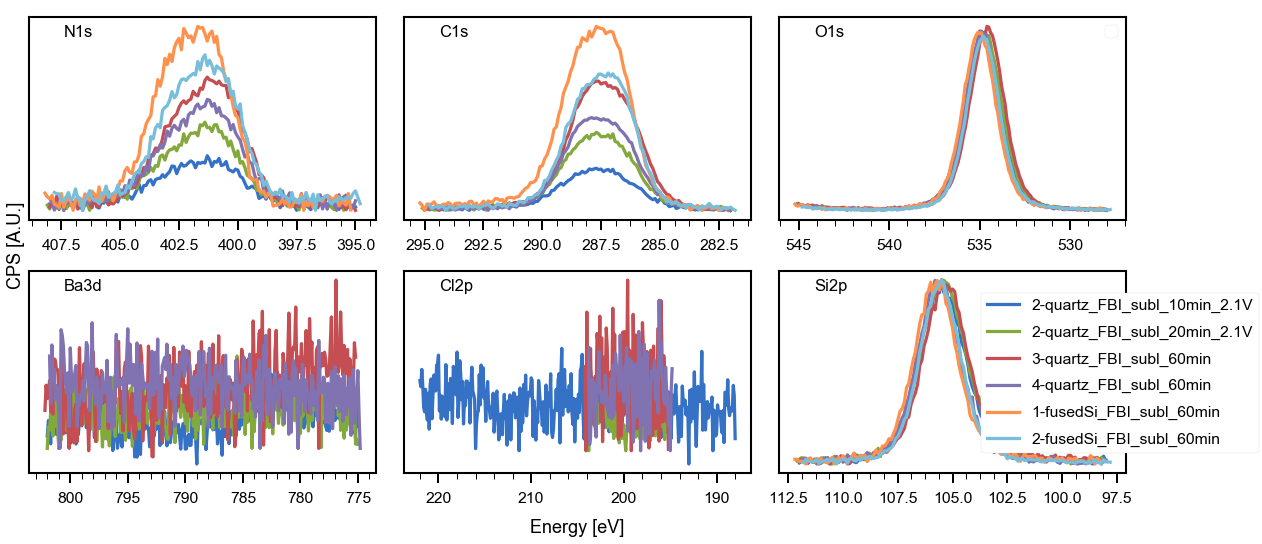

In [11]:
plot_xp_regions(fbi_exps, regions, ncols=3);

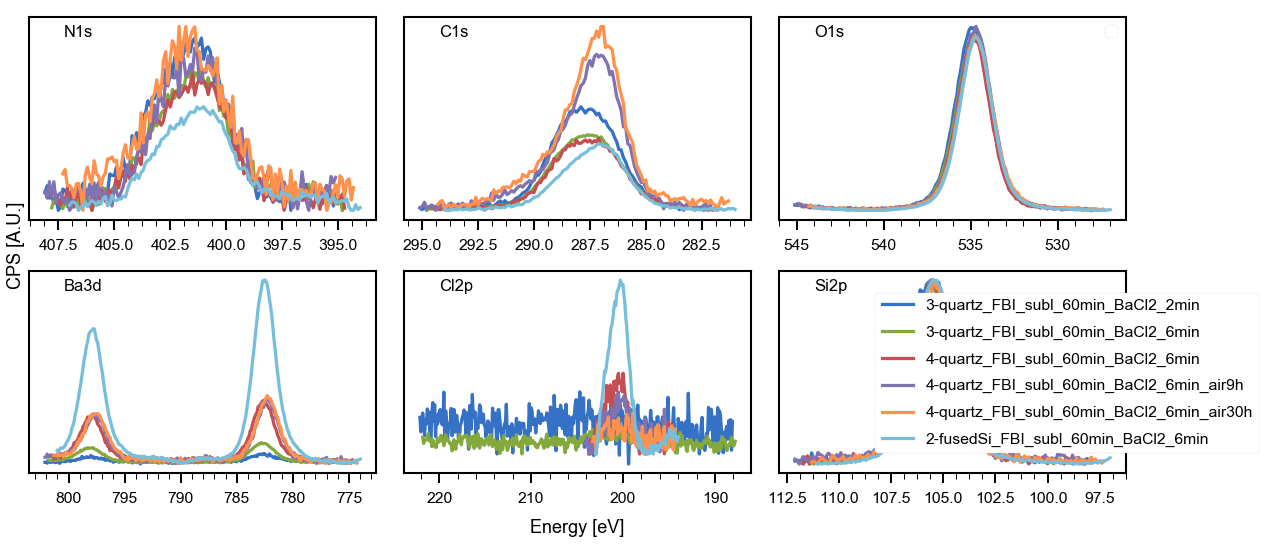

In [12]:
plot_xp_regions(ba_exps, regions, ncols=3);

## Before/After Ba

##### Sample 3

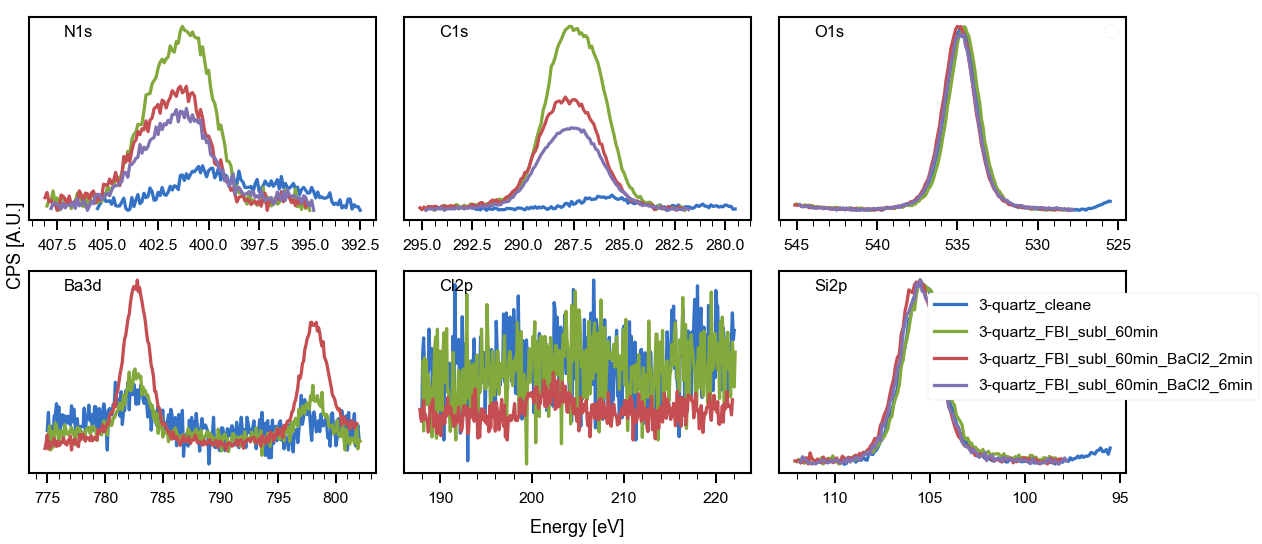

In [13]:
plot_xp_regions(samp3, regions);

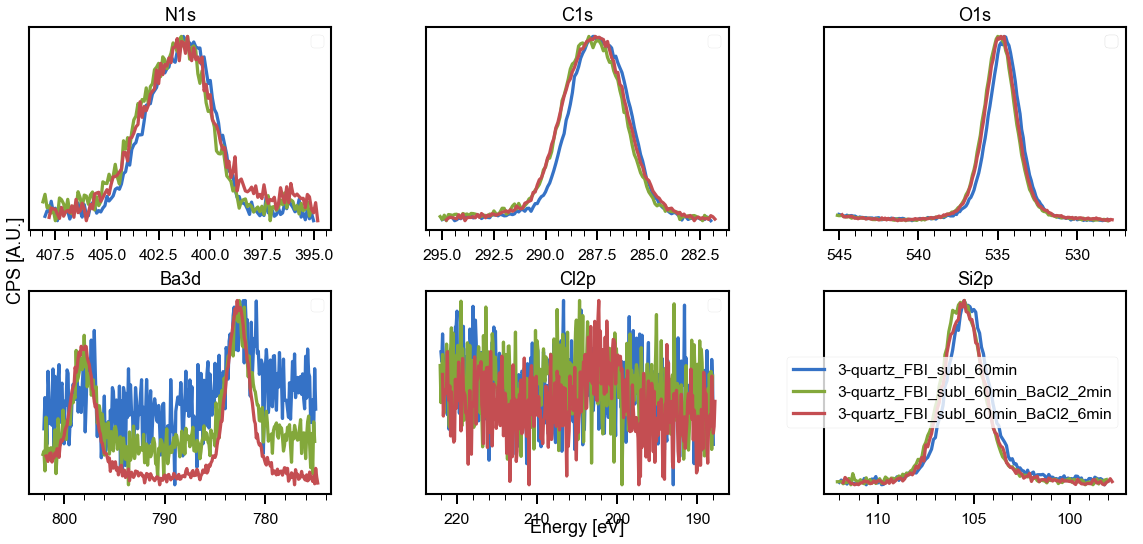

In [15]:
plot_normal_regions(samp3[1:], regions);

[Text(0, 0.5, '')]

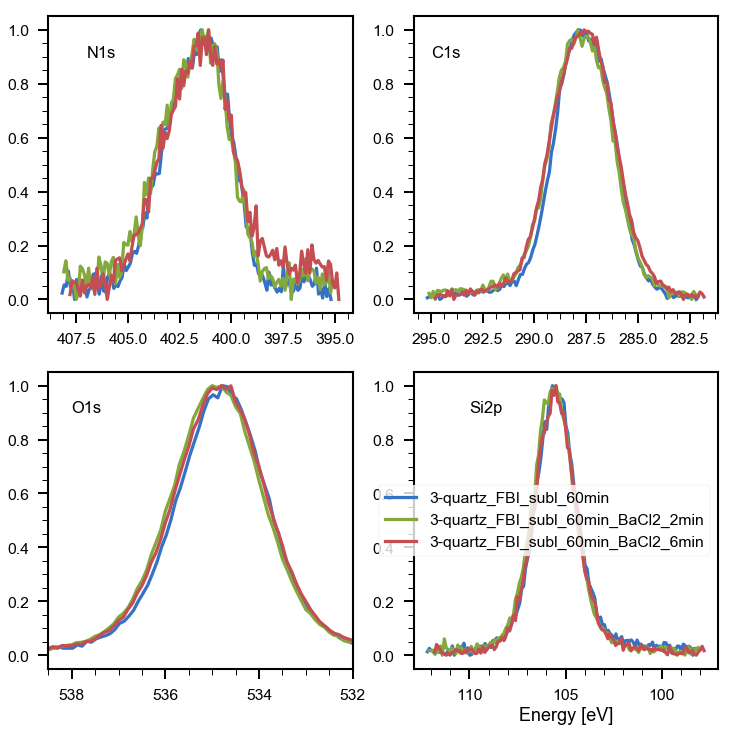

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
for i, xp in enumerate(samp3[1:]):
    xpn = normalise_dfx(xp)
    if i == 0:
        xpn = align_dfx(xpn, shift=0.18)
    plot_region(xpn, 'N1s', ax=ax[0,0])
    plot_region(xpn, 'C1s', ax=ax[0,1])
    plot_region(xpn, 'O1s', ax=ax[1,0])
    plot_region(xpn, 'Si2p', ax=ax[1,1])
    
ax[0,0].text(s='N1s', x=407, y=0.9)
ax[0,1].text(s='C1s', x=295, y=0.9)
ax[1,0].text(s='O1s', x=538, y=0.9)
ax[1,1].text(s='Si2p', x=110, y=0.9)
for a in ax:
    for aa in a: aa.invert_xaxis()
ax[1,0].set(xlim=(538.5, 532))
ax[1,1].set(ylabel=None)

##### Sample 4

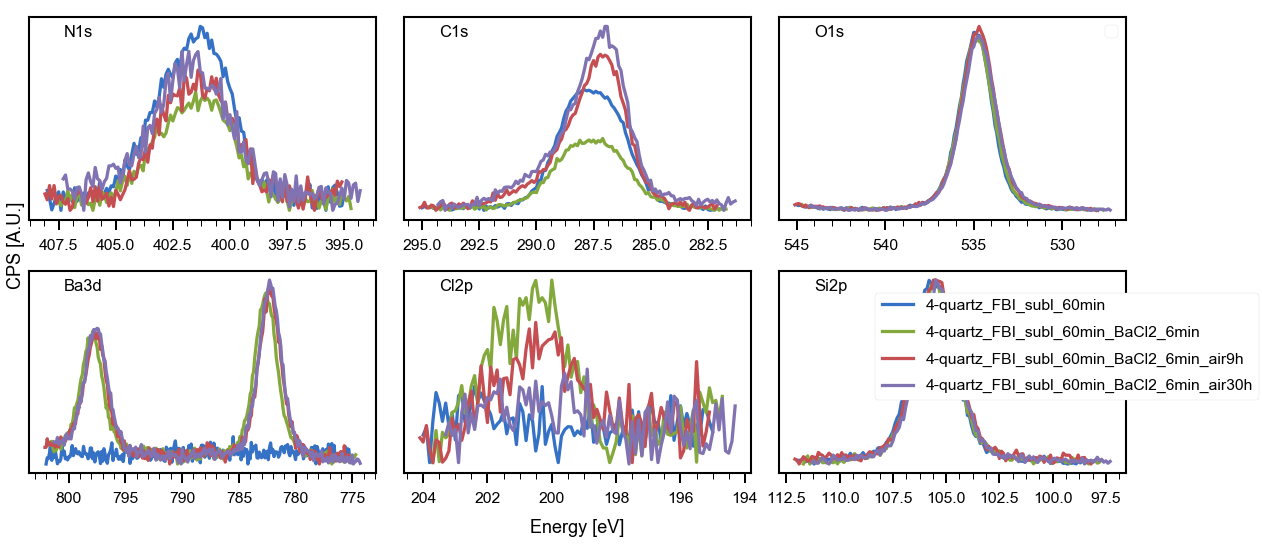

In [16]:
plot_xp_regions(samp4[1:], regions);

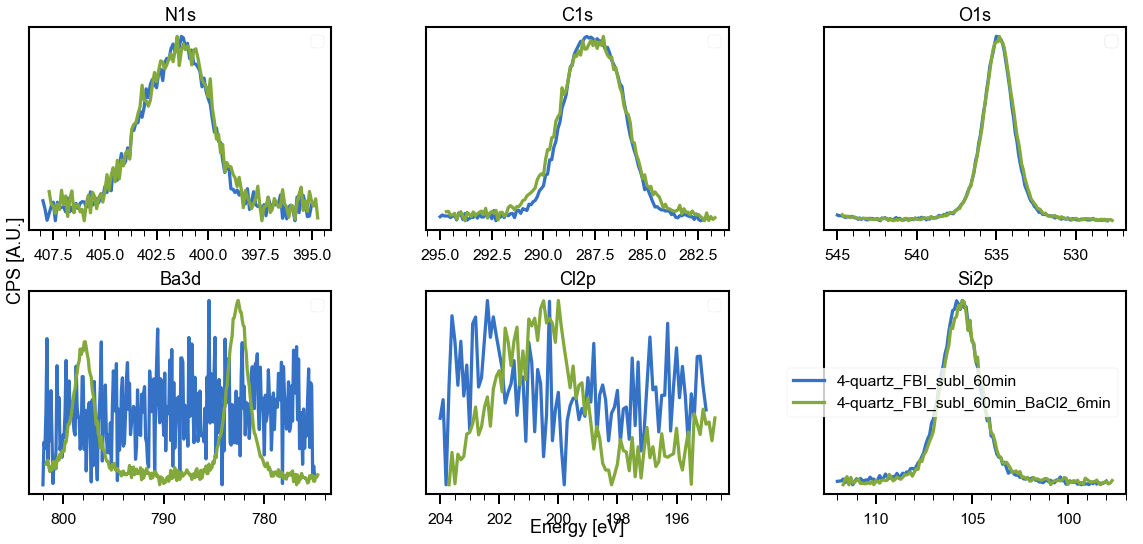

In [18]:
plot_normal_regions(samp4[1:3], regions);

##### Sample 4 after air exposure

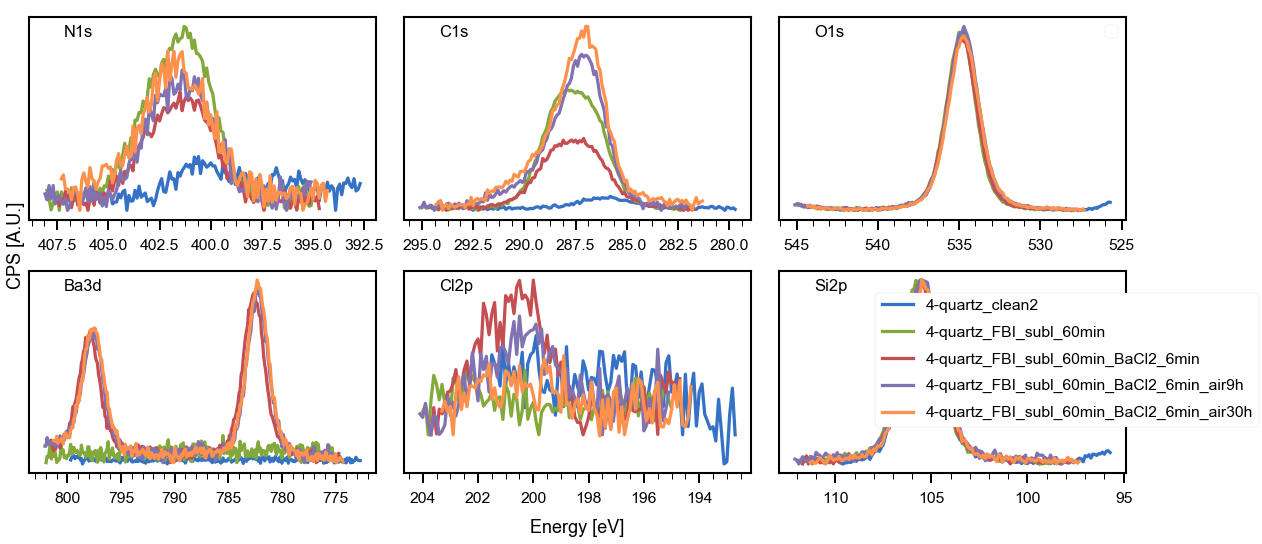

In [17]:
plot_xp_regions(samp4, regions);

##### Samples 1 & 2 (fused silica)

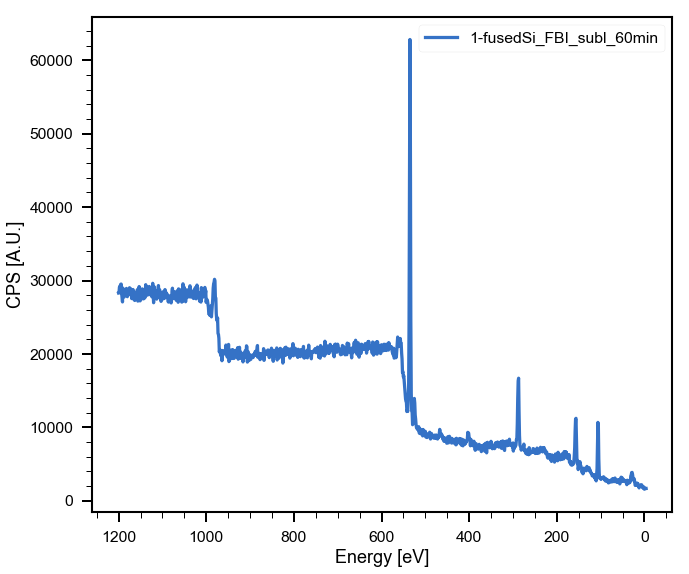

In [134]:
plot_region(samp12[1], 'overview')

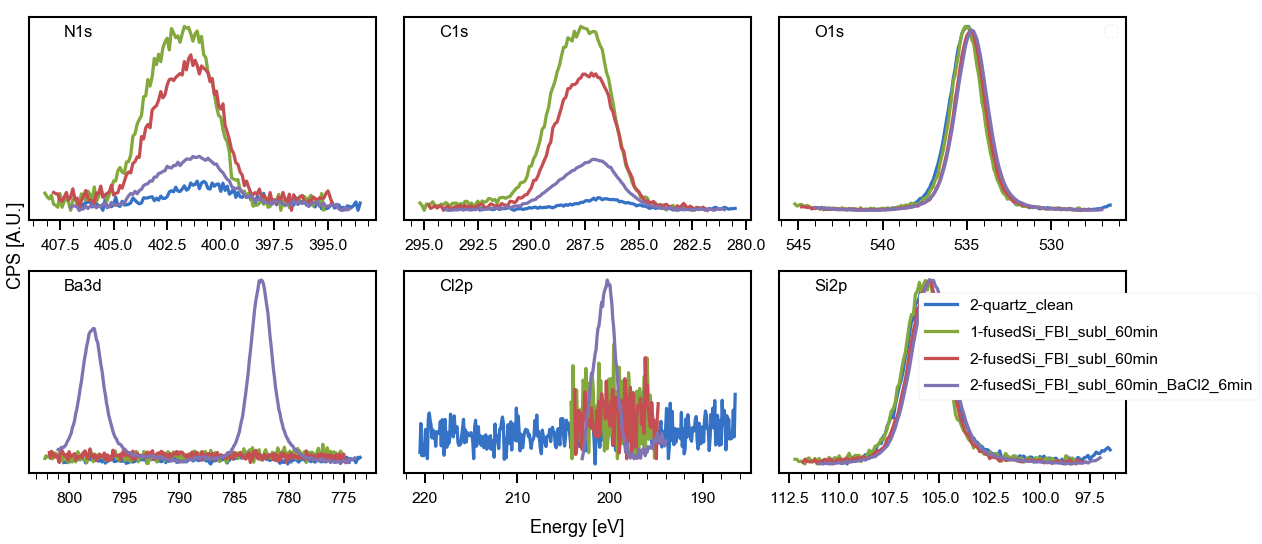

In [15]:
plot_xp_regions(samp12, regions);

## Subtract O 1s from substrate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11741a58>,
      dtype=object)

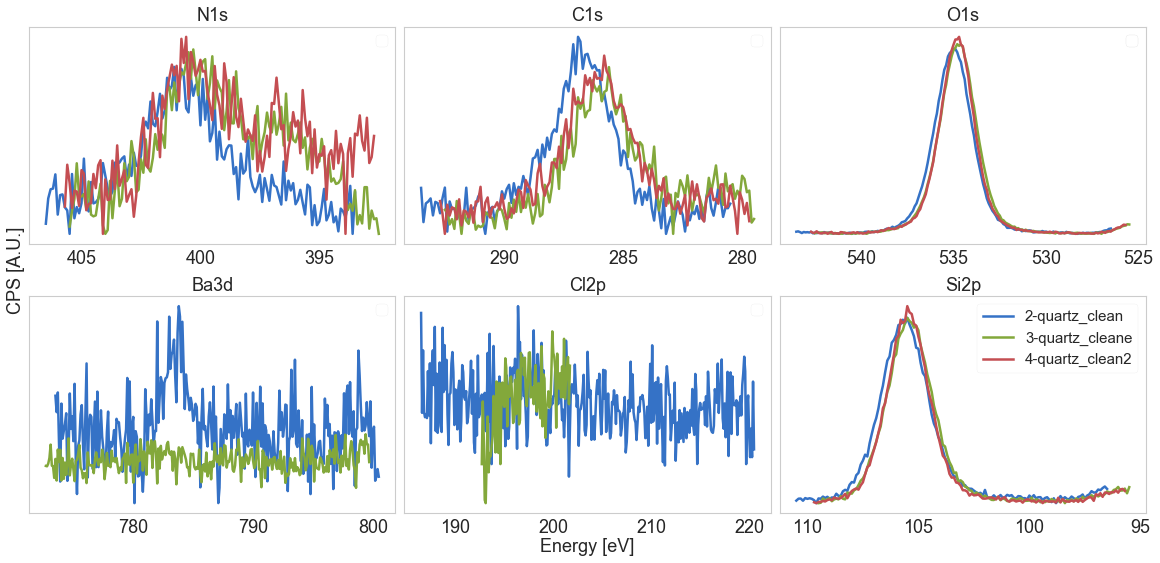

In [94]:
plot_xp_regions(clean_exps, regions)

### Sample 2

Text(0.5, 1.0, 'O 1s')

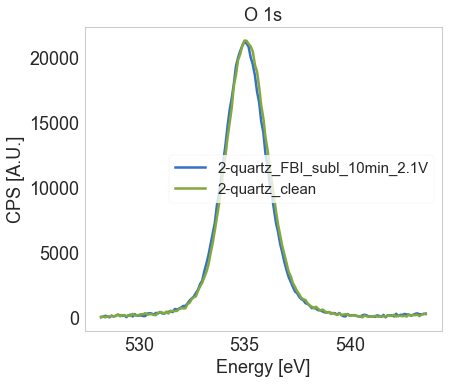

In [153]:
region = 'O1s'
xpf = fbi_exps[0]
xpc = clean_exps[0]
trim_spectra(xpf, xpc, region, inplace=True)
trim_spectra(xpc, xpf, region, inplace=True)
shift = find_shift(xpf, xpc, region)
align_dfx(xpf, shift, inplace=True)

plot_region(xpf, region)
plot_region(xpc, region)
plt.title('O 1s')

Text(0.5, 1.0, 'O 1s')

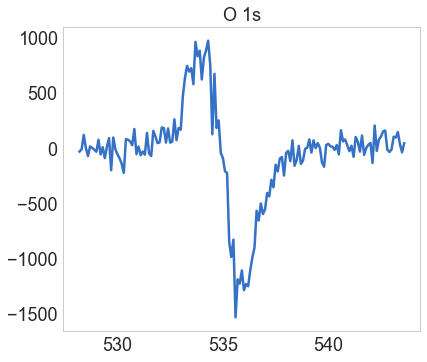

In [154]:
x = xpf.dfx[region].dropna().energy.values
y = xpf.dfx[region].dropna().counts.values

bl = xpc.dfx[region].dropna().counts.values
plt.plot(x, y-bl)
plt.title('O 1s')

[Text(0.5, 1.0, 'Si2p')]

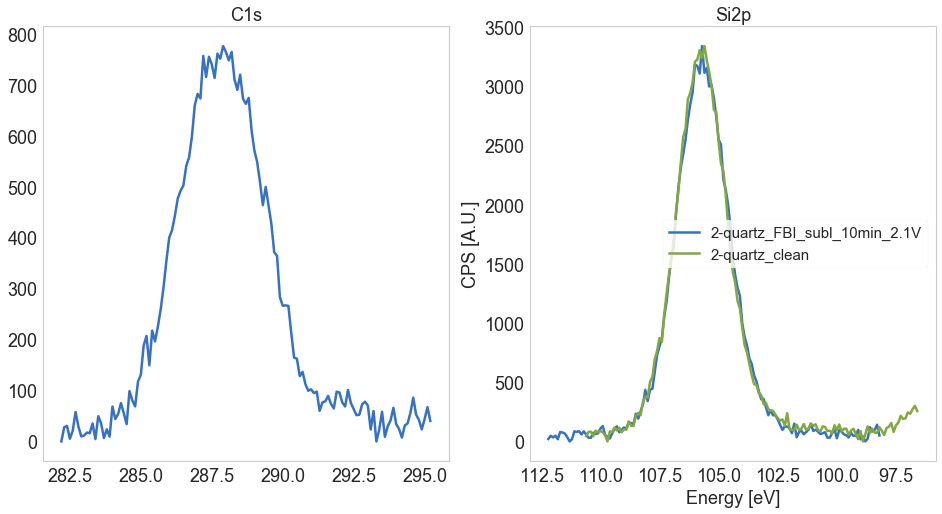

In [156]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
plot_region(xpf, 'C1s', ax=ax[0])
ax[0].set(title='C1s')
plot_region(xpf, 'Si2p', ax=ax[1])
plot_region(xpc, 'Si2p', ax=ax[1])
ax[1].set(title='Si2p')

### Sample 3

In [98]:
len(y2), len(bl), len(x2)

(135, 139, 135)

In [99]:
x2

array([542.4, 542.3, 542.2, 542.1, 542. , 541.9, 541.8, 541.7, 541.6,
       541.5, 541.4, 541.3, 541.2, 541.1, 541. , 540.9, 540.8, 540.7,
       540.6, 540.5, 540.4, 540.3, 540.2, 540.1, 540. , 539.9, 539.8,
       539.7, 539.6, 539.5, 539.4, 539.3, 539.2, 539.1, 539. , 538.9,
       538.8, 538.7, 538.6, 538.5, 538.4, 538.3, 538.2, 538.1, 538. ,
       537.9, 537.8, 537.7, 537.6, 537.5, 537.4, 537.3, 537.2, 537.1,
       537. , 536.9, 536.8, 536.7, 536.6, 536.5, 536.4, 536.3, 536.2,
       536.1, 536. , 535.9, 535.8, 535.7, 535.6, 535.5, 535.4, 535.3,
       535.2, 535.1, 535. , 534.9, 534.8, 534.7, 534.6, 534.5, 534.4,
       534.3, 534.2, 534.1, 534. , 533.9, 533.8, 533.7, 533.6, 533.5,
       533.4, 533.3, 533.2, 533.1, 533. , 532.9, 532.8, 532.7, 532.6,
       532.5, 532.4, 532.3, 532.2, 532.1, 532. , 531.9, 531.8, 531.7,
       531.6, 531.5, 531.4, 531.3, 531.2, 531.1, 531. , 530.9, 530.8,
       530.7, 530.6, 530.5, 530.4, 530.3, 530.2, 530.1, 530. , 529.9,
       529.8, 529.7,

In [100]:
xl

array([542.45, 542.35, 542.25, 542.15, 542.05, 541.95, 541.85, 541.75,
       541.65, 541.55, 541.45, 541.35, 541.25, 541.15, 541.05, 540.95,
       540.85, 540.75, 540.65, 540.55, 540.45, 540.35, 540.25, 540.15,
       540.05, 539.95, 539.85, 539.75, 539.65, 539.55, 539.45, 539.35,
       539.25, 539.15, 539.05, 538.95, 538.85, 538.75, 538.65, 538.55,
       538.45, 538.35, 538.25, 538.15, 538.05, 537.95, 537.85, 537.75,
       537.65, 537.55, 537.45, 537.35, 537.25, 537.15, 537.05, 536.95,
       536.85, 536.75, 536.65, 536.55, 536.45, 536.35, 536.25, 536.15,
       536.05, 535.95, 535.85, 535.75, 535.65, 535.55, 535.45, 535.35,
       535.25, 535.15, 535.05, 534.95, 534.85, 534.75, 534.65, 534.55,
       534.45, 534.35, 534.25, 534.15, 534.05, 533.95, 533.85, 533.75,
       533.65, 533.55, 533.45, 533.35, 533.25, 533.15, 533.05, 532.95,
       532.85, 532.75, 532.65, 532.55, 532.45, 532.35, 532.25, 532.15,
       532.05, 531.95, 531.85, 531.75, 531.65, 531.55, 531.45, 531.35,
      

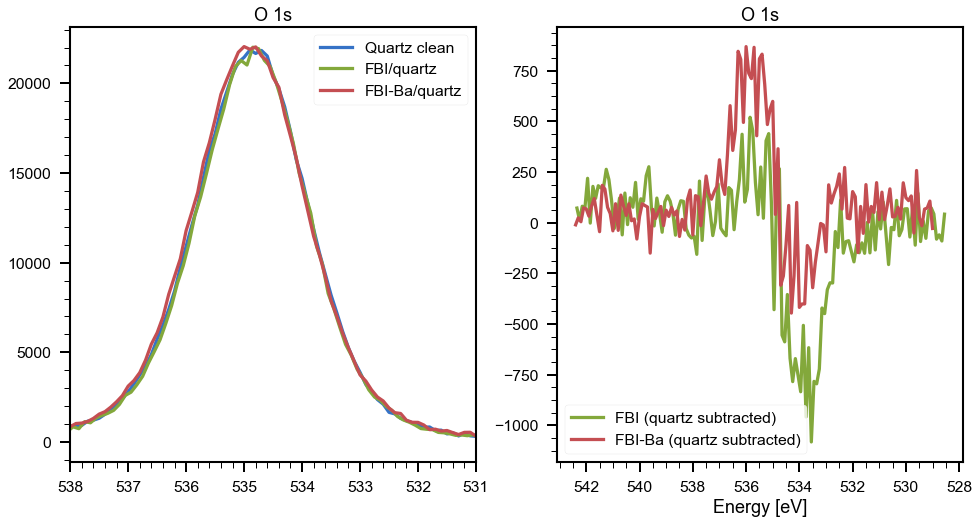

In [131]:
region = 'O1s'
xpc = align_dfx(samp3[0], shift=0.1)
xpf = align_dfx(samp3[1], shift=0.05)
xpb = align_dfx(samp3[2], shift=0)

trim_spectra(xpf, xpc, region, inplace=True)
trim_spectra(xpc, xpf, region, inplace=True)

fig, ax = plt.subplots(1,2, figsize=(16, 8))

plot_region(xpc, region, ax=ax[0], lb='Quartz clean')
plot_region(xpf, region, ax=ax[0], lb='FBI/quartz')
plot_region(xpb, region, ax=ax[0], lb='FBI-Ba/quartz')

ax[0].set(title='O 1s', xlim=(538,531))
ax[0].legend()
x = xpf.dfx[region].dropna().energy.values[1:]
xl = xpc.dfx[region].dropna().energy.values

y = xpf.dfx[region].dropna().counts.values[1:]
bl = xpc.dfx[region].dropna().counts.values
ax[1].plot(x, y-bl, 'g', label='FBI (quartz subtracted)')

x2 = xpb.dfx[region].dropna().energy.values
y2 = xpb.dfx[region].dropna().counts.values
bl = xpc.dfx[region].dropna().counts.values[:-4]

ax[1].plot(x2, y2-bl, 'r', label='FBI-Ba (quartz subtracted)')

ax[1].set(title='O 1s', ylabel=None)
ax[1].legend()
plt.savefig('/Users/pabloherrero/sabat/SABAT/txps/quartz_O1s.png')

### Sample 4

(-0.2999999999999545, -0.10000000000013642)

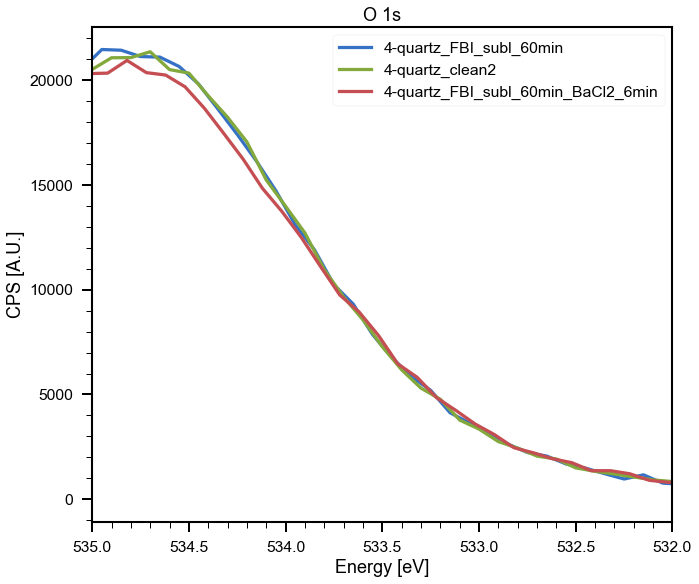

In [57]:
region = 'O1s'
xpf = deepcopy(samp4[1])
xpb = deepcopy(samp4[2])
xpc = samp4[0]

trim_spectra(xpf, xpc, region, inplace=True)
trim_spectra(xpc, xpf, region, inplace=True)
trim_spectra(xpb, xpf, region, inplace=True)

shift = find_shift(xpf, xpc, region)
shiftb = find_shift(xpb, xpc, region)

align_dfx(xpf, -0.05, inplace=True);
align_dfx(xpb, 0.02, inplace=True);

plot_region(xpf, region)
plot_region(xpc, region)
plot_region(xpb, region)
ax=plt.gca()
ax.set(xlim=(535, 532))
plt.title('O 1s')
shift, shiftb

Text(0.5, 1.0, 'O 1s')

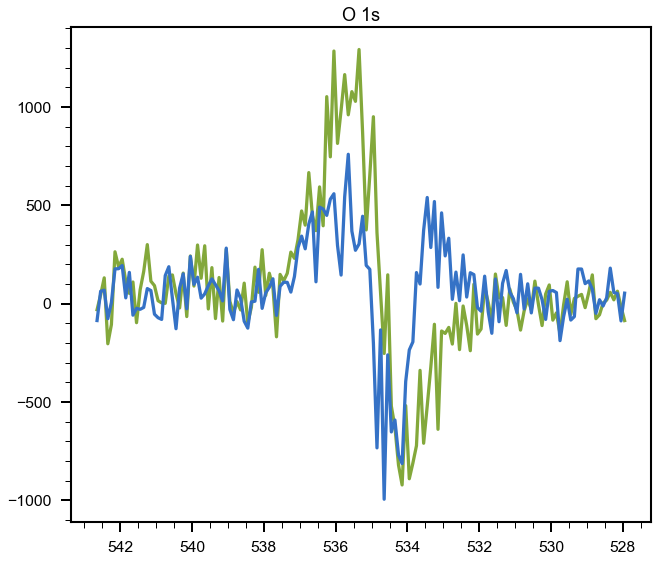

In [59]:
x = xpf.dfx[region].dropna().energy.values
y = xpf.dfx[region].dropna().counts.values
yb = xpb.dfx[region].dropna().counts.values

bl = xpc.dfx[region].dropna().counts.values
plt.plot(x, y-bl, 'g')
plt.plot(x, yb-bl, 'b')

plt.gca().invert_xaxis()
plt.title('O 1s')

In [52]:
posmx = np.argmax(y-bl)
posmin = np.argmin(y-bl)

x[posmx], x[posmin], (y-bl)[posmx], (y-bl)[posmin]

(535.35, 534.1500000000001, 1291.858264231425, -922.4839653354284)

[Text(0.5, 1.0, 'Si2p')]

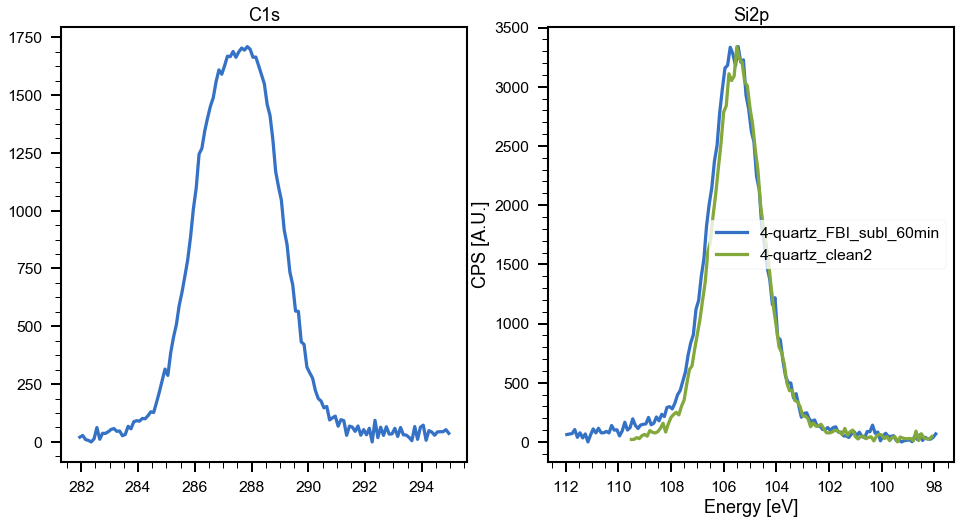

In [43]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
plot_region(xpf, 'C1s', ax=ax[0])
ax[0].set(title='C1s')
plot_region(xpf, 'Si2p', ax=ax[1])
plot_region(xpc, 'Si2p', ax=ax[1])
ax[1].set(title='Si2p')


In [44]:
region = 'Si2p'
trim_spectra(xpf, xpc, region, inplace=True)
trim_spectra(xpc, xpf, region, inplace=True)

shift = find_shift(xpf, xpc, region)
align_dfx(xpf, shift, inplace=True);

x = xpf.dfx['Si2p'].dropna().energy.values
y = xpf.dfx['Si2p'].dropna().counts.values

bl = xpc.dfx['Si2p'].dropna().counts.values
plt.plot(x, y-bl)

plt.title('Si 2p')

ValueError: operands could not be broadcast together with shapes (114,) (113,) 

## Integrate areas 

### C 1s

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[3152.0157695994185,
 5418.931800456764,
 8775.020376124821,
 6423.018916775796,
 12342.681012418157,
 9057.984906005648]

<Figure size 460.8x403.2 with 0 Axes>

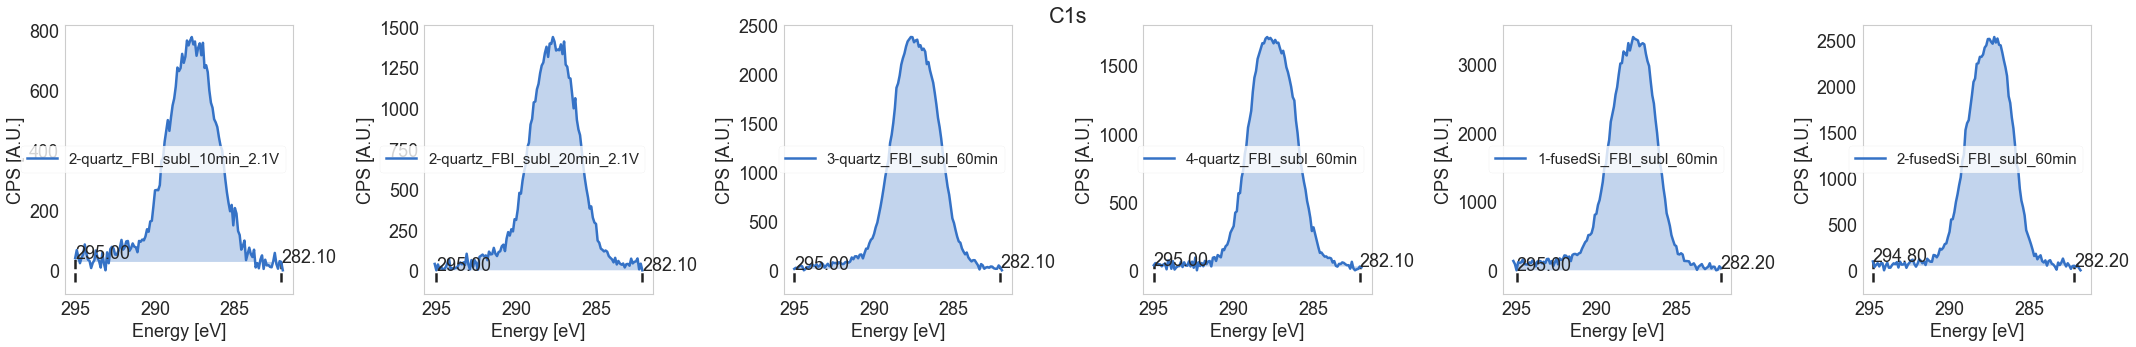

In [43]:
region = 'C1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[5595.2941723935955,
 4222.553993034358,
 4060.963772524925,
 7489.884999221246,
 8806.569186464623,
 4060.9637725272323,
 3293.3940219768406]

<Figure size 460.8x403.2 with 0 Axes>

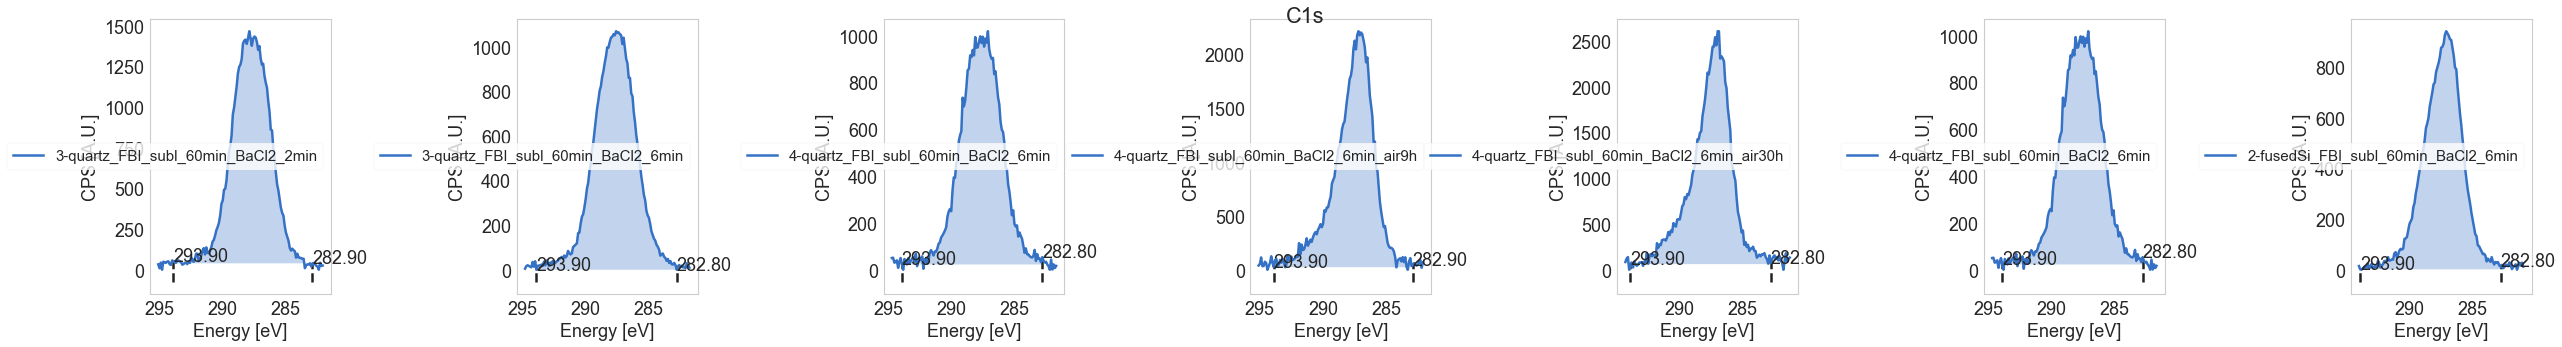

In [44]:
region = 'C1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[790.5909625484642, 679.060200059552, 727.6685168476139, 483.5098320060268]

<Figure size 460.8x403.2 with 0 Axes>

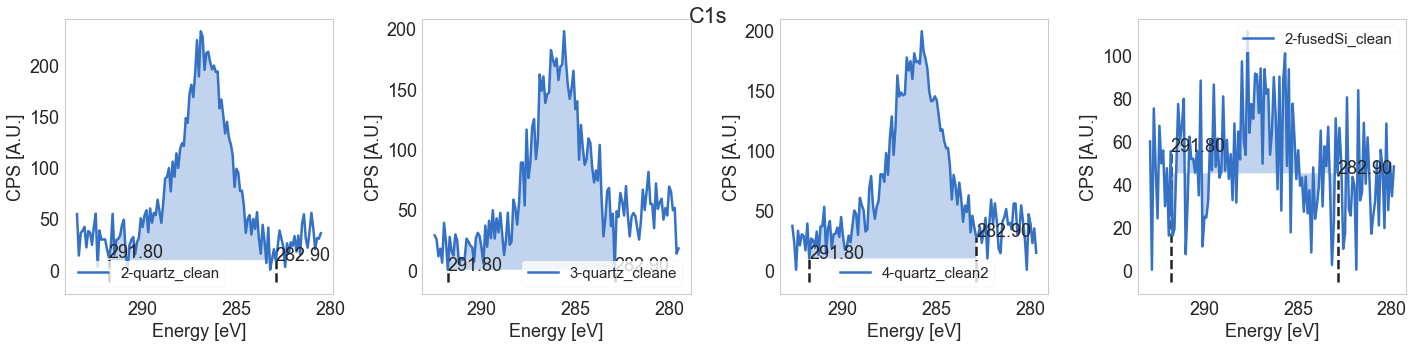

In [37]:
region = 'C1s'
integrateRegions(clean_exps, region, indRef=1, asf=asf)

#### Correct for bg substrate abundance

In [35]:
clean_exps[0].name

'2-quartz_clean'

In [45]:
for xp in fbi_exps[:2]:
    uncorr_area = xp.area['C1s']
    xp.area.update({'C1s': uncorr_area - clean_exps[0].area['C1s']})

In [46]:
for xp in [fbi_exps[2]]+ba_exps[:2]:
    uncorr_area = xp.area['C1s']
    xp.area.update({'C1s': uncorr_area - clean_exps[1].area['C1s']})

In [47]:
for xp in [fbi_exps[3]]+ba_exps[2:6]:
    uncorr_area = xp.area['C1s']
    xp.area.update({'C1s': uncorr_area - clean_exps[2].area['C1s']})

In [49]:
for xp in [fbi_exps[4], fbi_exps[5], ba_exps[6]]:
    uncorr_area = xp.area['C1s']
    xp.area.update({'C1s': uncorr_area - clean_exps[3].area['C1s']})

### O 1s

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[55497.401058845295,
 56231.85581714541,
 55672.538427812906,
 52642.5725642424,
 52637.861973530766,
 50242.713410526056]

<Figure size 460.8x403.2 with 0 Axes>

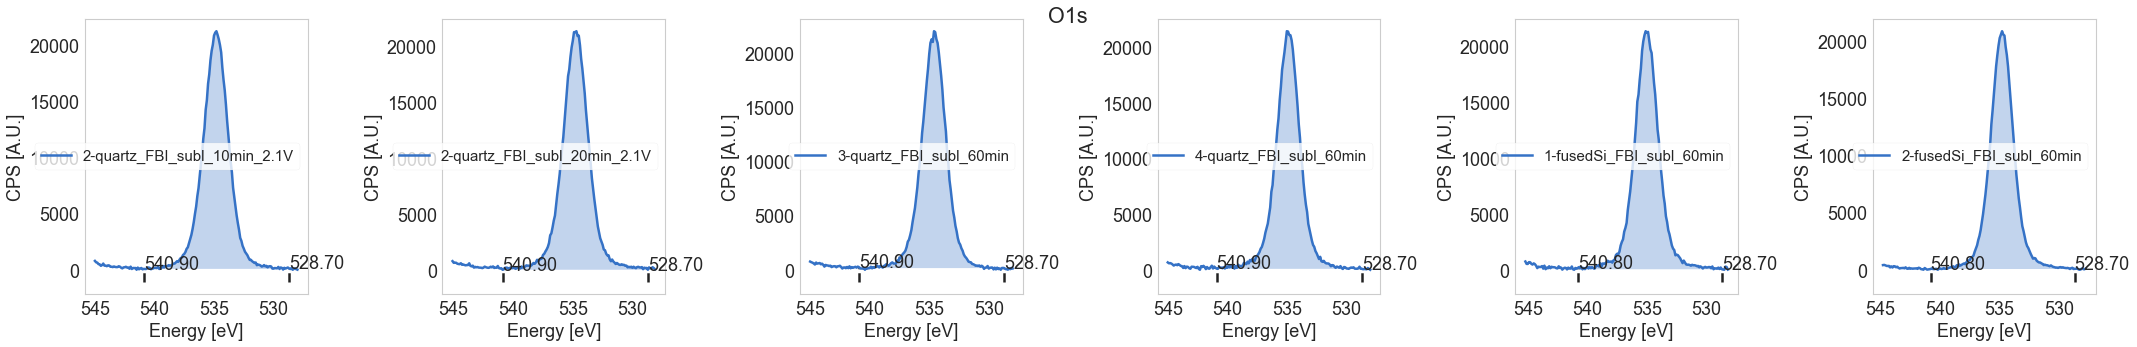

In [60]:
region = 'O1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[58029.26348489868,
 56157.53487693727,
 52558.90202236589,
 56559.36774201691,
 54412.935387440564,
 52558.90202236589,
 52058.03915239458]

<Figure size 460.8x403.2 with 0 Axes>

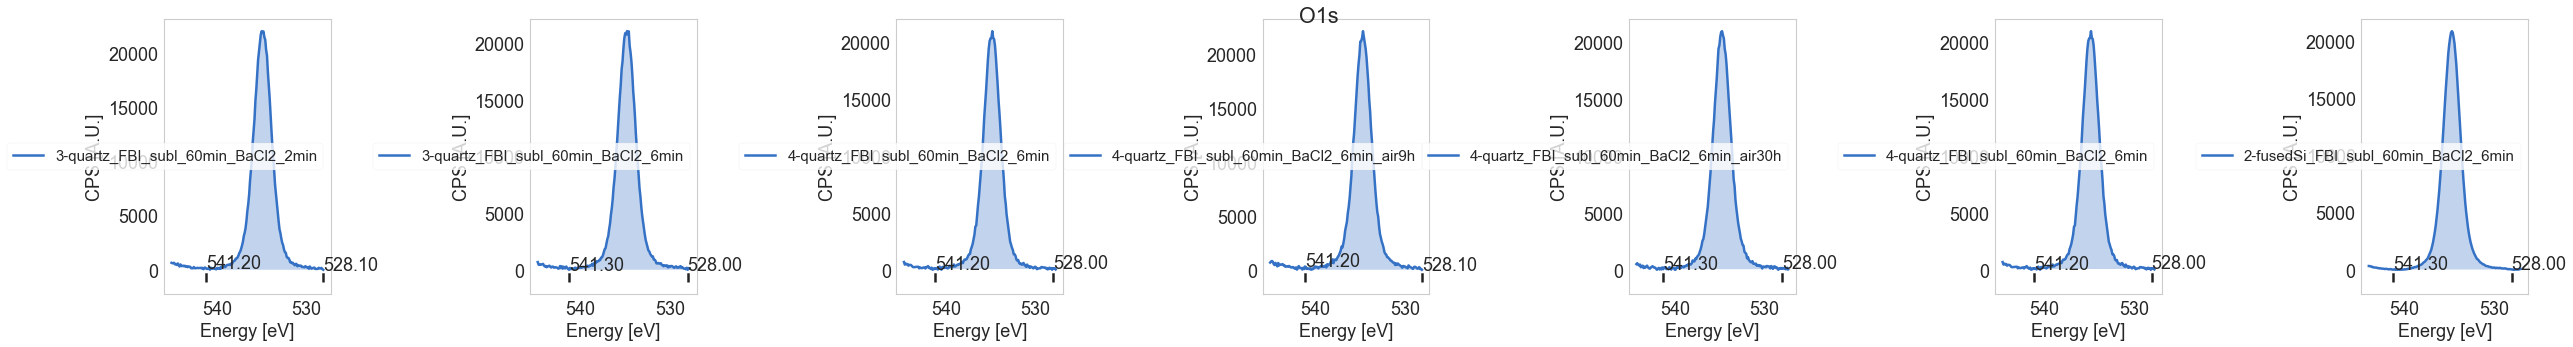

In [61]:
region = 'O1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[56313.349290652375, 56521.387329128826, 51610.73943232426, 52572.41212312458]

<Figure size 460.8x403.2 with 0 Axes>

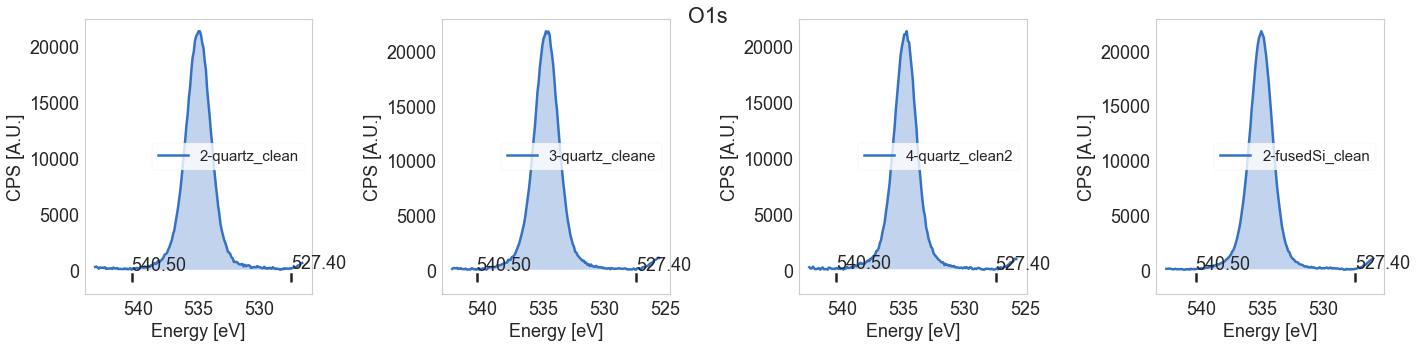

In [62]:
region = 'O1s'
integrateRegions(clean_exps, region, indRef=1, asf=asf)

#### Correct for bg substrate abundance

In [54]:
for xp in fbi_exps[:2]:
    uncorr_area = xp.area['O1s']
    xp.area.update({'O1s': uncorr_area - clean_exps[0].area['O1s']})

In [55]:
for xp in [fbi_exps[2]]+ba_exps[:2]:
    uncorr_area = xp.area['O1s']
    xp.area.update({'O1s': uncorr_area - clean_exps[1].area['O1s']})

In [56]:
for xp in [fbi_exps[3]]+ba_exps[2:6]:
    uncorr_area = xp.area['O1s']
    xp.area.update({'O1s': uncorr_area - clean_exps[2].area['O1s']})

In [57]:
for xp in [fbi_exps[4], fbi_exps[5], ba_exps[6]]:
    uncorr_area = xp.area['O1s']
    xp.area.update({'O1s': uncorr_area - clean_exps[3].area['O1s']})

In [59]:
[xp.area['O1s'] for xp in fbi_exps]

[-1147.6065144965978,
 -114.61810619826429,
 -1193.8803112741589,
 1451.2420983377524,
 92.05323545173451,
 -3276.650791277818]

### N 1s

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[760.0102914990083,
 1135.570675495786,
 1686.0454140611068,
 1460.4364606094116,
 2315.1781270303686,
 1996.135484349477]

<Figure size 460.8x403.2 with 0 Axes>

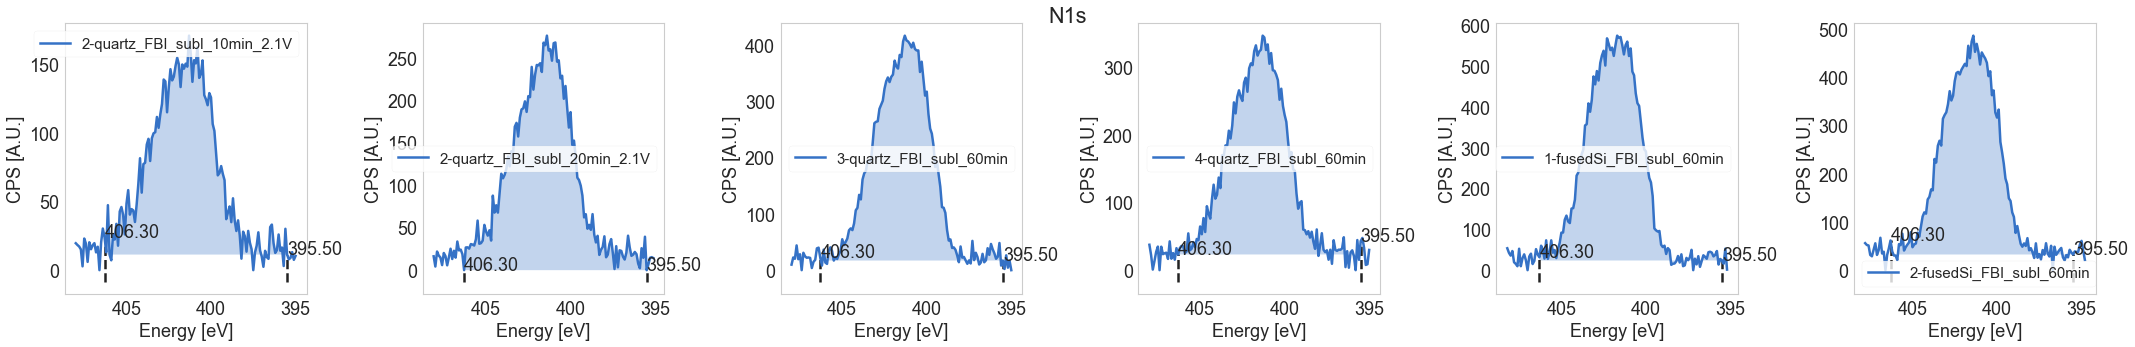

In [63]:
region = 'N1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[1199.1391371558104,
 1033.5109454588337,
 976.9401594435037,
 1130.5446507438753,
 1333.1510845423845,
 976.940159444059,
 757.4434709518765]

<Figure size 460.8x403.2 with 0 Axes>

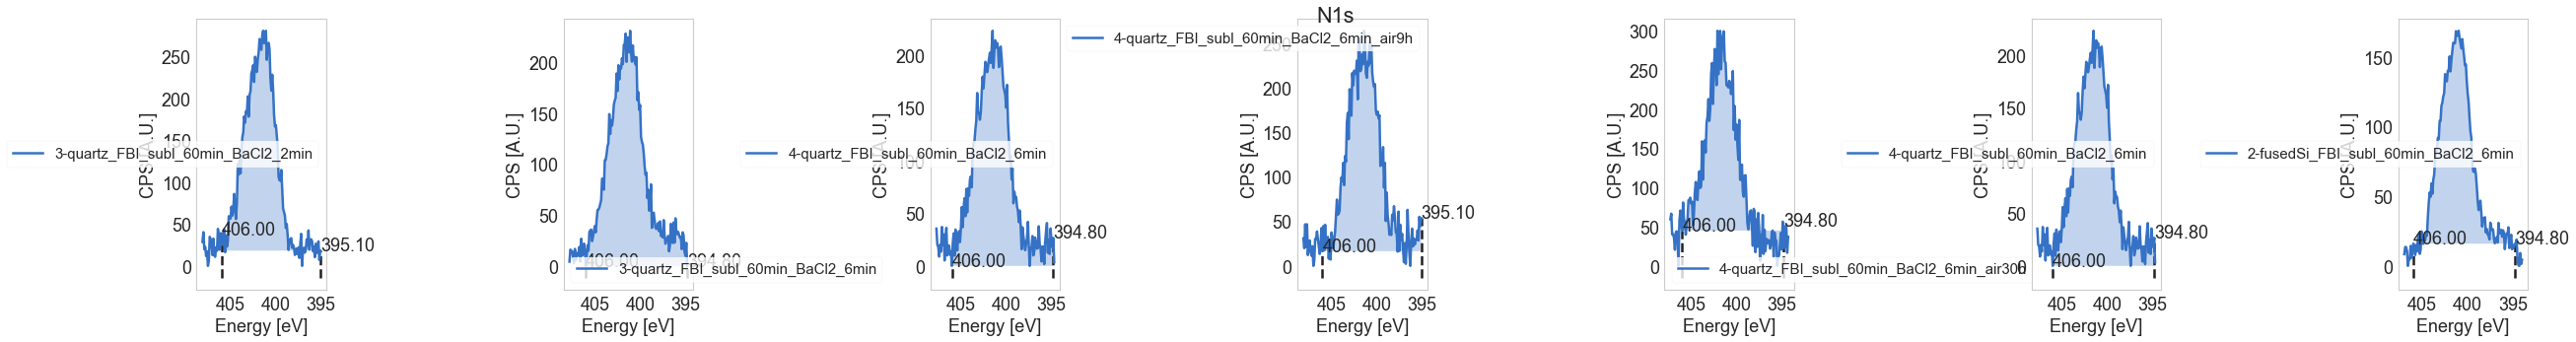

In [80]:
region = 'N1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[418.9113376122186, 575.5830672976172, 605.5080553331236, 798.3115716100028]

<Figure size 460.8x403.2 with 0 Axes>

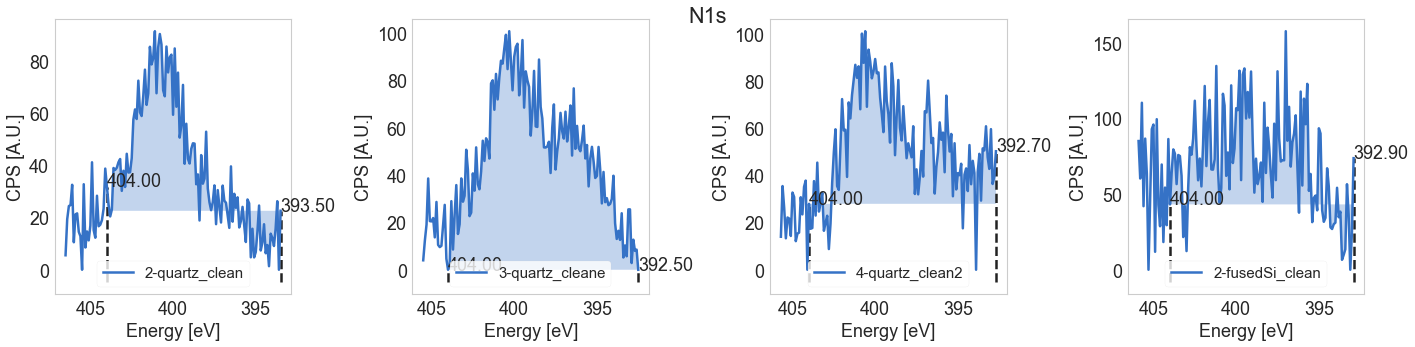

In [65]:
region = 'N1s'
integrateRegions(clean_exps, region, indRef=1, asf=asf)

In [81]:
for xp in fbi_exps[:2]:
    uncorr_area = xp.area['N1s']
    xp.area.update({'N1s': uncorr_area - clean_exps[0].area['N1s']})

In [82]:
for xp in [fbi_exps[2]]+ba_exps[:2]:
    uncorr_area = xp.area['N1s']
    xp.area.update({'N1s': uncorr_area - clean_exps[1].area['N1s']})

In [83]:
for xp in [fbi_exps[3]]+ba_exps[2:6]:
    uncorr_area = xp.area['N1s']
    xp.area.update({'N1s': uncorr_area - clean_exps[2].area['N1s']})

### Si 2p

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[9359.109531336368,
 9815.829883999118,
 9440.890056507156,
 8924.42853018438,
 9087.007941468233,
 8435.48266370858]

<Figure size 460.8x403.2 with 0 Axes>

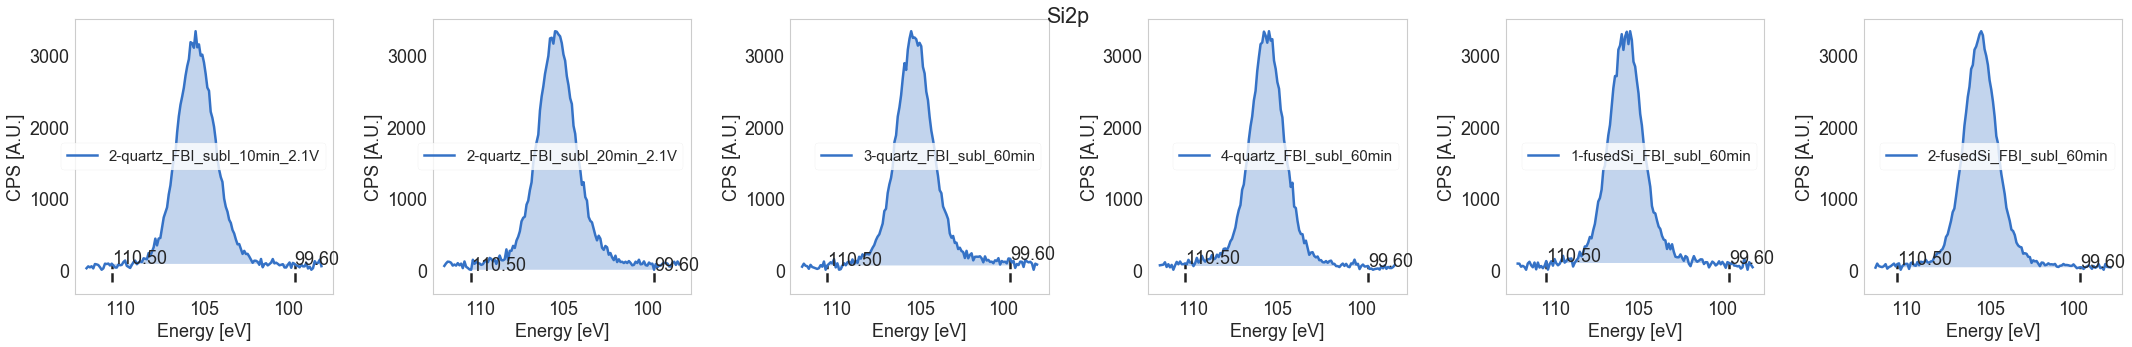

In [70]:
region = 'Si2p'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[9616.095103384274,
 9134.438761603298,
 8745.59730332128,
 9539.665837820472,
 8700.083627697648,
 8745.597303320035,
 8700.679158481453]

<Figure size 460.8x403.2 with 0 Axes>

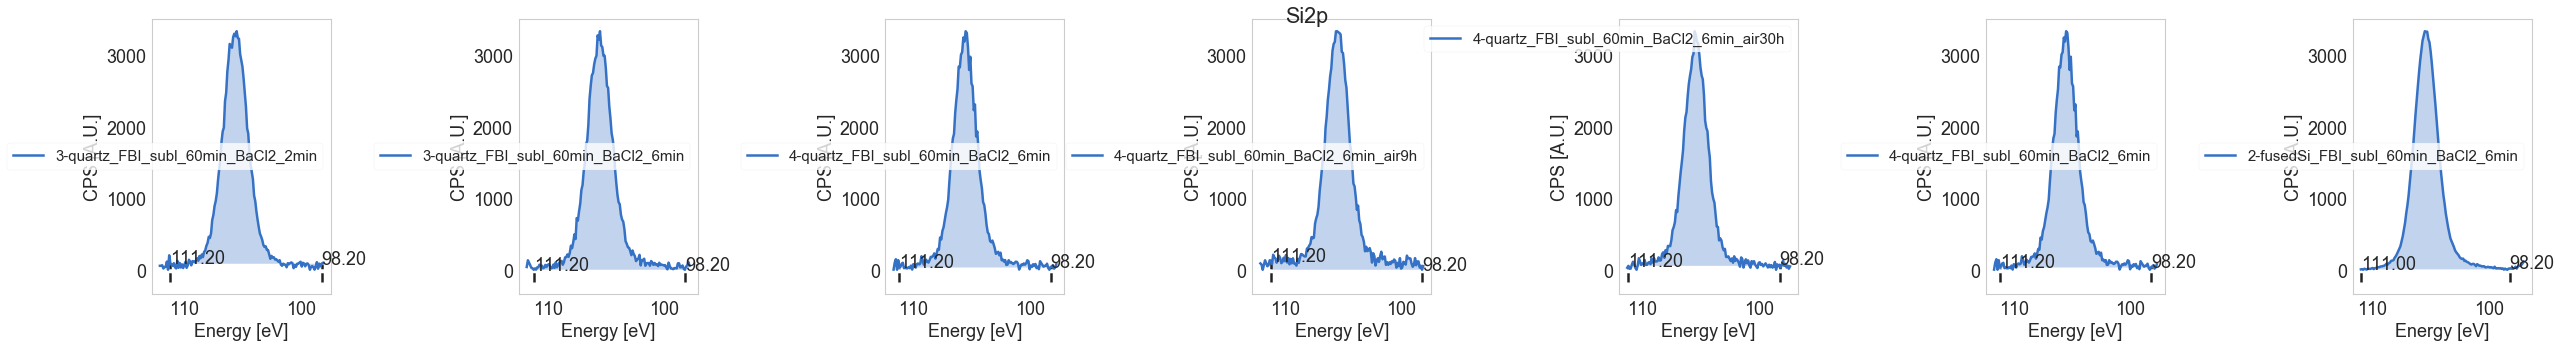

In [71]:
region = 'Si2p'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[9519.574730941298, 8883.42887272412, 8119.680782392373, 8134.437801238337]

<Figure size 460.8x403.2 with 0 Axes>

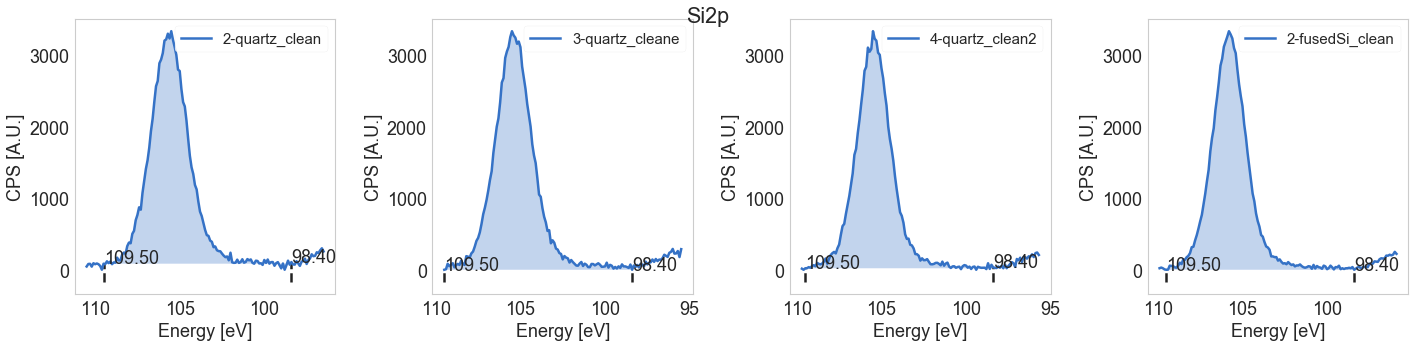

In [72]:
region = 'Si2p'
integrateRegions(clean_exps, region, indRef=1, asf=asf)

### Ba 3d

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[3412.0345768023567,
 5508.573428479418,
 15595.794882396036,
 16003.2484657294,
 16255.138995527373,
 15595.794882396038,
 39661.414543223924]

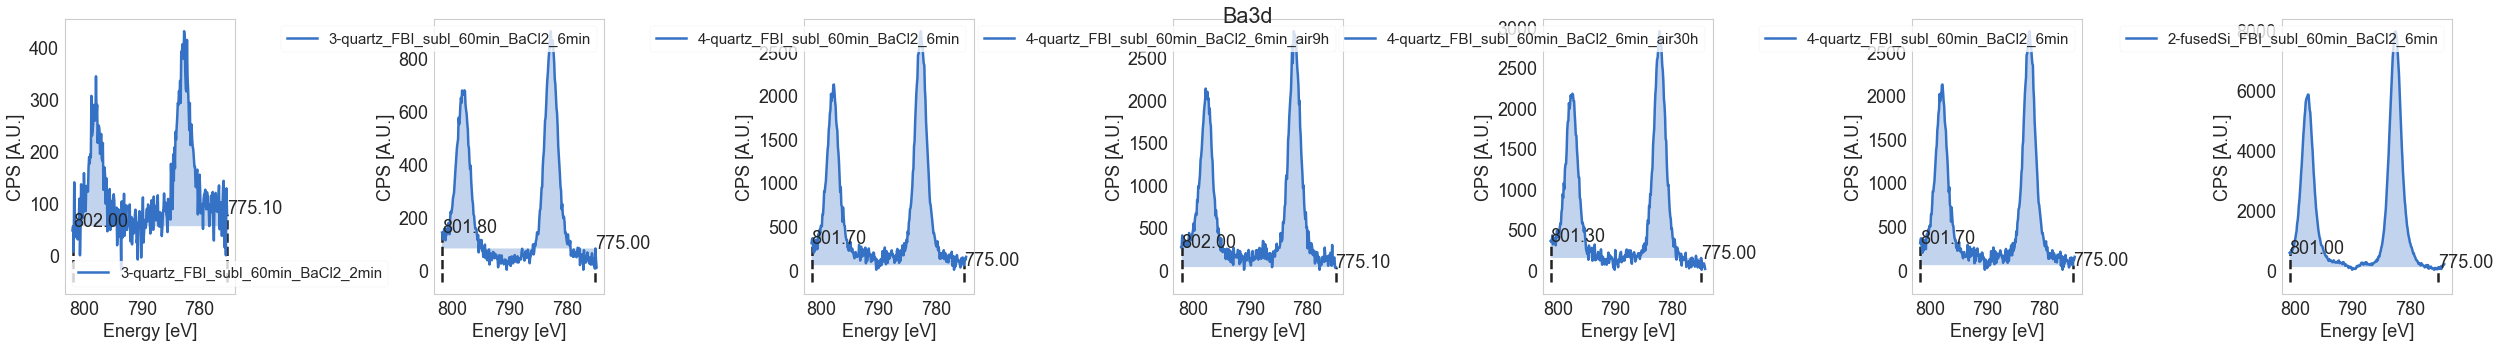

In [73]:
region = 'Ba3d'
integrateRegions(ba_exps, region, indRef=1, asf=asf, eup=802, edw=775)

### Cl 2p

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/

[483.29762978291274,
 267.3887093762902,
 686.0920465465217,
 554.8310789620477,
 361.6496289946871,
 686.0920465463269,
 1325.5409576057655]

<Figure size 460.8x403.2 with 0 Axes>

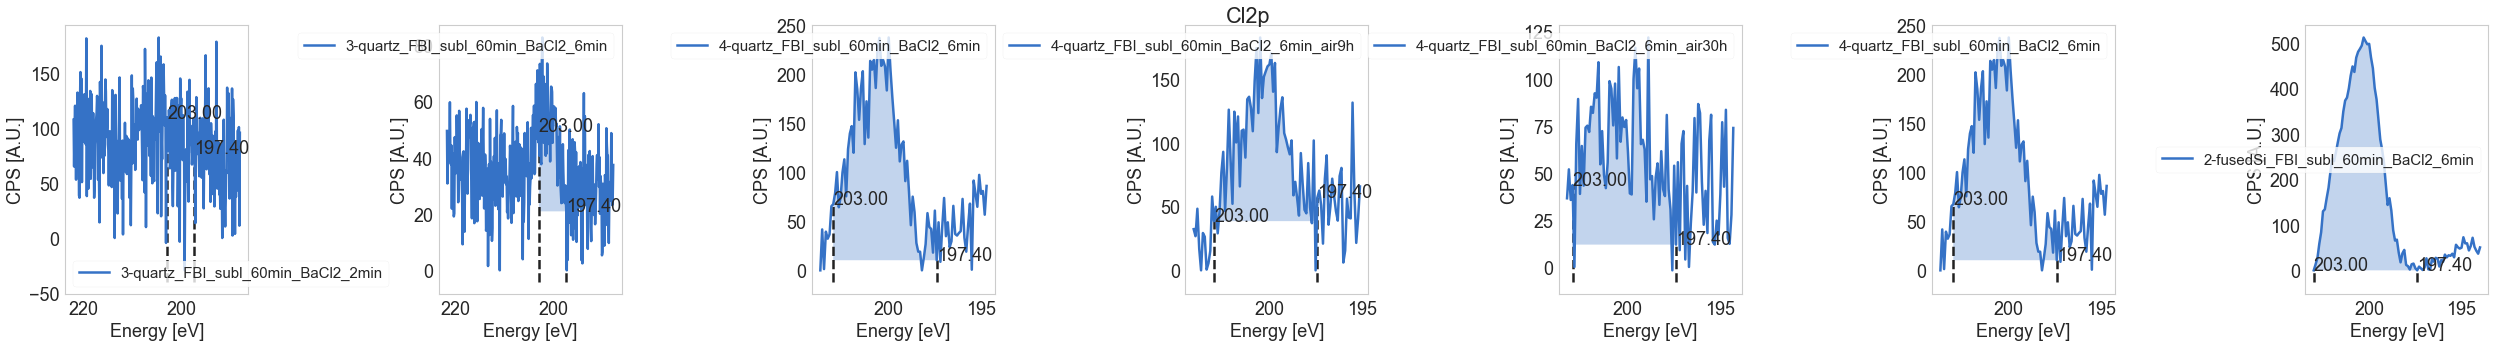

In [76]:
region = 'Cl2p'
integrateRegions(ba_exps, region, indRef=6, asf=asf)

## Stoichiometry 

In [78]:
num, denom = (('N1s', 'C1s', 'C1s'), ('O1s', 'N1s', 'O1s'))
make_stoichometry_table(fbi_exps,  num=num, denom=denom)

Experiment	N/O	C/N	C/O	
2-quartz_FBI_subl_10min_2.1V	0.01 	 11.16 	 0.10 	 
2-quartz_FBI_subl_20min_2.1V	0.02 	 10.41 	 0.20 	 
3-quartz_FBI_subl_60min	0.03 	 11.75 	 0.35 	 
4-quartz_FBI_subl_60min	0.02 	 10.74 	 0.26 	 
1-fusedSi_FBI_subl_60min	0.04 	 12.60 	 0.54 	 
2-fusedSi_FBI_subl_60min	0.04 	 11.54 	 0.41 	 


In [84]:
num, denom = (('N1s', 'C1s', 'C1s', 'Ba3d', 'Cl2p'), ('O1s', 'N1s', 'O1s', 'N1s', 'Ba3d'))
make_stoichometry_table(ba_exps,  num=num, denom=denom)

Experiment	N/O	C/N	C/O	Ba/N	Cl/Ba	
3-quartz_FBI_subl_60min_BaCl2_2min	0.02 	 12.71 	 0.20 	 0.35 	 1.19 	 
3-quartz_FBI_subl_60min_BaCl2_6min	0.01 	 12.47 	 0.15 	 0.77 	 0.41 	 
4-quartz_FBI_subl_60min_BaCl2_6min	0.01 	 14.46 	 0.15 	 2.67 	 0.37 	 
4-quartz_FBI_subl_60min_BaCl2_6min_air9h	0.01 	 20.76 	 0.29 	 1.94 	 0.29 	 
4-quartz_FBI_subl_60min_BaCl2_6min_air30h	0.02 	 17.89 	 0.36 	 1.42 	 0.19 	 
4-quartz_FBI_subl_60min_BaCl2_6min	0.01 	 14.46 	 0.15 	 2.67 	 0.37 	 
2-fusedSi_FBI_subl_60min_BaCl2_6min	0.02 	 5.98 	 0.13 	 3.33 	 0.28 	 


In [54]:
print('Nominal')
print('N/O \t C/N \t \t C/O ')
print(3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5) )

Nominal
N/O 	 C/N 	 	 C/O 
0.6 	 10.333 	 6.200


## Compare to depositions on Cu 

In [61]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if (' ' not in f) and ('/proc' in f) :
        files_new.append(f)
        
files = files_new[2:]
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_05min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_10min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_20min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_clean.sxy']

In [62]:
cu_exps = []
for f in files:
    cu_exps.append(read_processed_xp(f))

In [63]:
for xp in cu_exps:
    try:
        xp.dfx.rename_axis({'N_1s': 'N1s'}, axis=1, copy=False, inplace=True)
        xp.dfx.rename_axis({'C_1s': 'C1s'}, axis=1, copy=False, inplace=True)
        xp.dfx.rename_axis({'O_1s': 'O1s'}, axis=1, copy=False, inplace=True)
        
    except KeyError:
        pass

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  after removing the cwd from sys.path.
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """


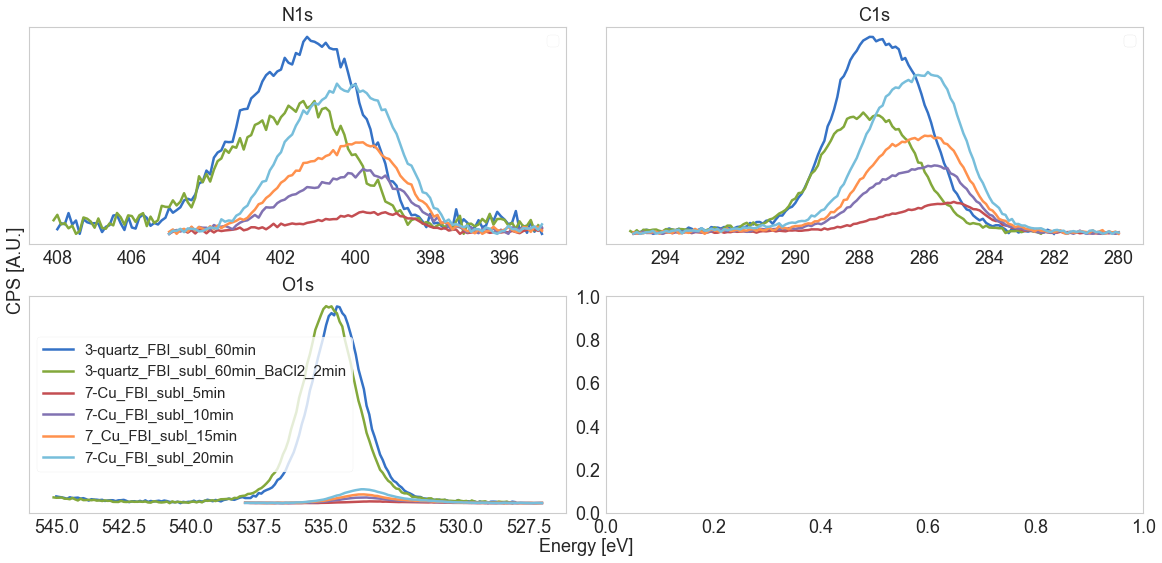

In [64]:
regions = ['N1s', 'C1s', 'O1s']
plot_xp_regions(proc_exps[3:5] + cu_exps[:4], regions, ncols=2);

In [58]:
for xp in proc_exps[3:5]:
        shift = find_shift(xp, cu_exps[0], region='N1s')
        align_dfx(xp, shift, inplace=True)

In [59]:
shift

1.0000000000001137

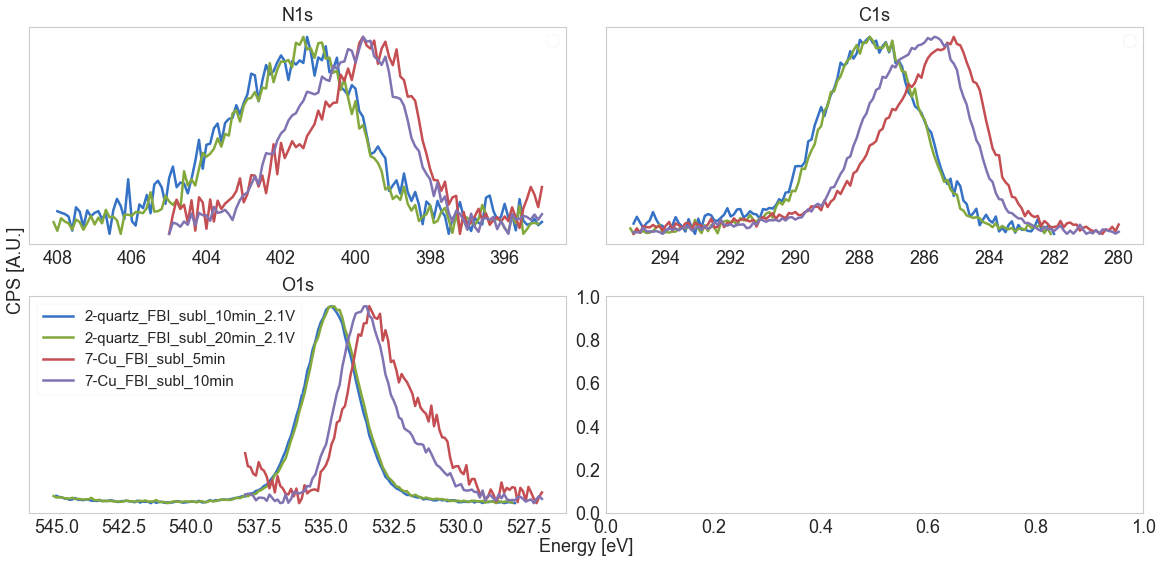

In [66]:
regions = ['N1s', 'C1s', 'O1s']
plot_normal_regions(proc_exps[:2] + cu_exps[:2], regions, ncols=2);

# Thickness from Si 2p/ Si 2s attenuation

$$ I_f = I_0 \exp{\left(-\frac{d_A }{\lambda_A \cos\theta} \right)}, $$

where $I_f$ and $I_0$ are the covered and clean intensities of the copper, $d_A$ is the coverage (thickness of layer A), $\theta$ is the takeoff angle and $\lambda_A$ is the inelastic mean free path of the material (IMFP).

$\lambda_{FBI}$(1387.6 eV = Si 2p 3/2) = 4.64 nm

$\cos\theta = \cos$(10º) = 0.9848

In [55]:
hv = 1486.61
hv - 932, hv - 99

(554.6099999999999, 1387.61)

$$ d_A = \lambda_A \cos\theta \log (I_0/I_f) $$


In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if (' ' not in f) and ('/proc' in f) :
        files_new.append(f)
        
files = files_new
files[5],files[6] = files[6],files[5]
# files[8],files[11] = files[11],files[8]

files


['/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_10min_2.1V.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_FBI_subl_20min_2.1V.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_26_quartz/proc/20210126_2-quartz_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_FBI_subl_60min_BaCl2_2min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210130_3-quartz_FBI_subl_60min_BaCl2_6min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_01_28_quartz/proc/20210129_3-quartz_cleane.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_FBI/FBI_subl/2021_02_09_quartz/proc/20210209_4-quartz_FBI_subl_60min.uxy',
 '/Users/

In [8]:
keys = [str(i)+'-quartz' for i in range(2,5)] + ['-fusedSi']
exps = {k:[] for k in keys}
for k in keys:
    for f in files:
        xp = read_processed_xp(f)
        if k in f:
            exps[k].append(xp)

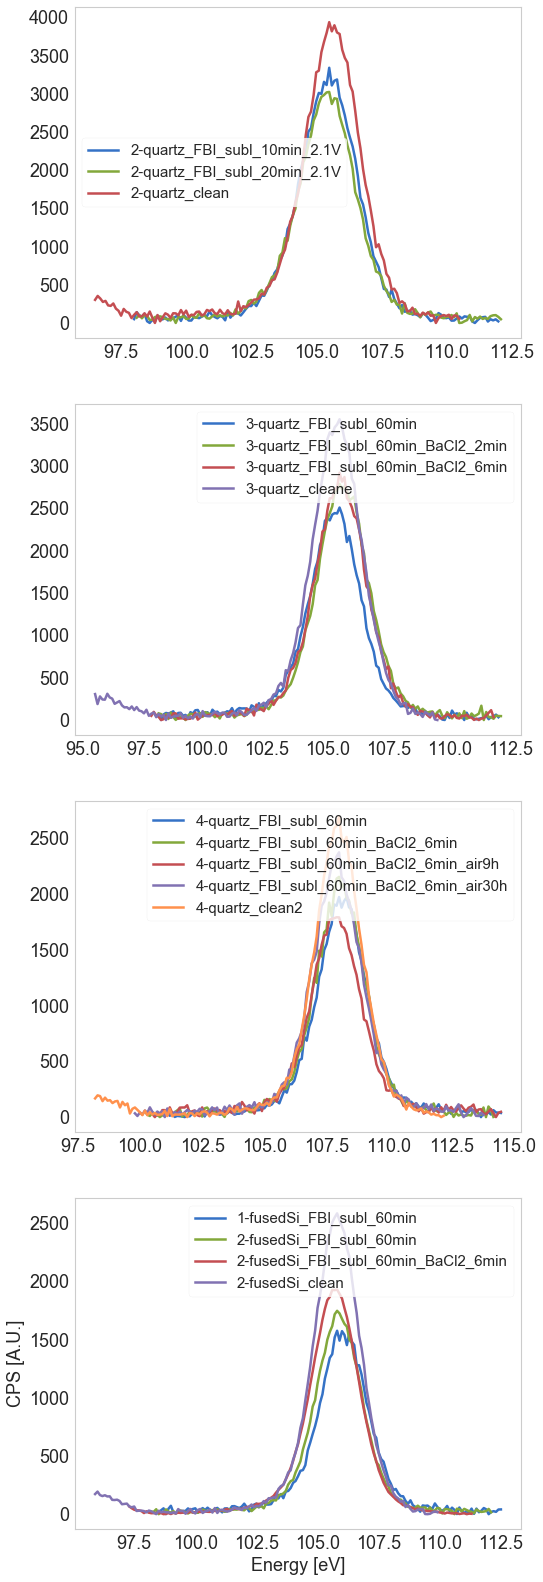

In [159]:
fig, ax = plt.subplots(4, figsize=(8, 28))
for i,k in enumerate(keys):
    for xp in exps[k]:
        plot_region(xp, 'Si2p', ax=ax[i])
        ax[i].legend()

In [6]:
from invisible_cities.core.system_of_units import nm
thickness = []
thickness.append(layer_thickness(xpf=fbi_exps[0], xp0=clean_exps[0], region='Si2p', mfp=3.84*nm, takeoff = 10))
thickness.append(layer_thickness(xpf=fbi_exps[0], xp0=clean_exps[0], region='Si2p', mfp=3.84*nm, takeoff = 10))
thickness.append(layer_thickness(xpf=fbi_exps[0], xp0=clean_exps[0], region='Si2p', mfp=3.84*nm, takeoff = 10))
thickness.append(layer_thickness(xpf=fbi_exps[0], xp0=clean_exps[0], region='Si2p', mfp=3.84*nm, takeoff = 10))
thickness.append(layer_thickness(xpf=fbi_exps[0], xp0=clean_exps[0], region='Si2p', mfp=3.84*nm, takeoff = 10))

In [9]:
thickness = []
for i,k in enumerate(keys):
    for xp in exps[k][:-1]:
        thick = layer_thickness(xpf=xp, xp0=exps[k][-1], region='Si2p', mfp=3.84*nm, takeoff = 10)
        print('%s: %.3f ± %.3f nm ' %(xp.name, thick[0]/nm, thick[1]/nm ) )
        thickness.append(thick)
thickm = np.matrix(thickness)    

2-quartz_FBI_subl_10min_2.1V: 0.757 ± 0.052 nm 
2-quartz_FBI_subl_20min_2.1V: 0.942 ± 0.053 nm 
3-quartz_FBI_subl_60min: 1.174 ± 0.058 nm 
3-quartz_FBI_subl_60min_BaCl2_2min: 0.763 ± 0.057 nm 
3-quartz_FBI_subl_60min_BaCl2_6min: 0.784 ± 0.057 nm 
4-quartz_FBI_subl_60min: 0.906 ± 0.069 nm 
4-quartz_FBI_subl_60min_BaCl2_6min: 0.686 ± 0.068 nm 
4-quartz_FBI_subl_60min_BaCl2_6min_air9h: 1.051 ± 0.070 nm 
4-quartz_FBI_subl_60min_BaCl2_6min_air30h: 0.339 ± 0.066 nm 
1-fusedSi_FBI_subl_60min: 1.505 ± 0.074 nm 
2-fusedSi_FBI_subl_60min: 1.415 ± 0.073 nm 
2-fusedSi_FBI_subl_60min_BaCl2_6min: 0.962 ± 0.071 nm 


Text(0.5, 1.0, 'FBI thickness')

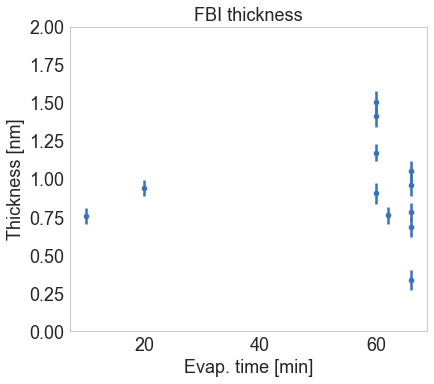

In [10]:

tsublq = [10, 20, 60, 62, 66, 60, 66, 66, 66, 60, 60, 66]
plt.errorbar(x=tsublq, y=thickm[:,0]/nm, yerr=thickm[:,1]/nm, fmt='o', label='Quartz FBI evaporations')

plt.ylim(0.001, 2)

plt.ylabel('Thickness [nm]')
plt.xlabel('Evap. time [min]')
plt.title('FBI thickness')

In [14]:
thickm[5]/nm

matrix([[1.24011539, 0.08661853]])

In [192]:
np.array(thickm[3])[0][0] / nm

0.7467617650812982

In [288]:
from invisible_cities.core.system_of_units import micron3, nm, micron

In [242]:
fbi_n_density(np.array(thickm[5])[0])[0] 

2919182.5232188674

In [244]:
fbi_n_density(np.array(thickm[5])[0])[0] * micron3

0.0029191825232188677

In [273]:
def fbi_n_density(thick_ml: tuple):
    """Compute the atomic density for an FBI (molecule radius hardcoded) cylindric layer
    of height thick_ml (must include central value and error)"""
    from invisible_cities.core.system_of_units import nm

    r_fbi = 0.683 * nm   # from Fernando's calculation, globularity 1
    V_fbi = r_fbi**3 * 4/3* np.pi

    a_fov = np.pi*1**2          # Assume an homogeneous layer of radius 1 mm2
    V_fov = a_fov * thick_ml[0] 
    dV_fov = a_fov * thick_ml[1]

    N_molecs = V_fov / V_fbi # Molecs per mm3
    dN_molecs = dV_fov / V_fbi
    return N_molecs, dN_molecs

In [274]:
thick_ml = np.array(thickm[5])[0]
r_fbi = 0.683 * nm   # from Fernando's calculation, globularity 1
V_fbi = r_fbi**3 * 4/3* np.pi

a_fov = np.pi*1e-3**2          # Assume an homogeneous layer of radius 1 mm2
V_fov = a_fov * thick_ml[0] 
dV_fov = a_fov * thick_ml[1]

N_molecs = V_fov / V_fbi # Molecs per mm3
dN_molecs = dV_fov / V_fbi

In [275]:
print('%.2e' %(V_fov / (nm**3)) )

3.90e+06


In [276]:
print('%.2e' %(V_fbi / (nm**3)) )

1.33e+00


In [277]:
print('%.2e' %(N_molecs ) )

2.92e+06


In [253]:
print('%.2e' %fbi_n_density(np.array(thickm[5])[0])[0])

2.92e+06


In [286]:
p_0 = 11.02e-3 # W
hc = 1.986e-25 # J m
E_gamma = hc/(405*nm*1e-3)
N_gamma = p_0/E_gamma
N_gamma, E_gamma

(2.247280966767372e+16, 4.903703703703703e-19)

In [289]:
A_fov = np.pi*(0.5*micron*1e-3)**2

In [293]:
np.pi/(4*np.sqrt(3))

0.45344984105855446

In [294]:
np.pi/(12*(r_fbi/nm/1e-3)**2)

5.612123496998845e-07

In [296]:
NA = 0.6
z = 1
SA = 2*np.pi*(1-np.sqrt(1-NA**2))
SA/(4*np.pi)

0.09999999999999998

In [215]:
thick_cu_r= np.matrix([[0.399, 0.006],
[1.500, 0.007],
[0.626, 0.007]])

In [213]:
thick_cu = np.matrix([[0.947, 0.006],
[2.045, 0.007],
[2.732, 0.007],
[3.602, 0.008],
[1.110, 0.006],
[3.011, 0.008],
[6.116, 0.011],
[0.825, 0.006]])

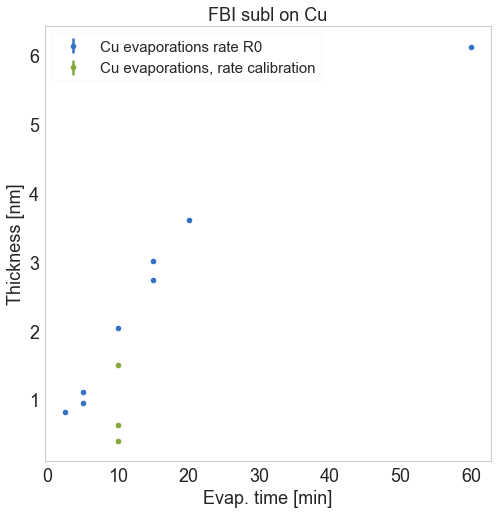

In [74]:
plt.figure(figsize=(8,8))
tsubl = [5, 10, 15, 20, 5, 15, 60, 2.5]
plt.errorbar(x=tsubl, y=thick_cu[:,0], yerr=thick_cu[:,1], fmt='o', label='Cu evaporations rate R0')
tsublR = [10, 10, 10]
plt.errorbar(x=tsublR, y=thick_cu_r[:,0], yerr=thick_cu_r[:,1], fmt='o', label='Cu evaporations, rate calibration')

# fit = np.polyfit(np.log(tsubl), thickm[:,0], 1)

# xvals = np.arange(2, 60, 0.1)
# fitvals = np.polyval(fit, np.log(xvals)) / nm
# plt.plot(xvals, fitvals, '-', label='Log fit: y = %.2f %.2f log x' %(fit[0]/nm, fit[1]/nm)) 

plt.ylabel('Thickness [nm]')
plt.xlabel('Evap. time [min]')
plt.title('FBI subl on Cu')
plt.legend()

In [226]:
len(tsublq), len(thickm)

(11, 9)

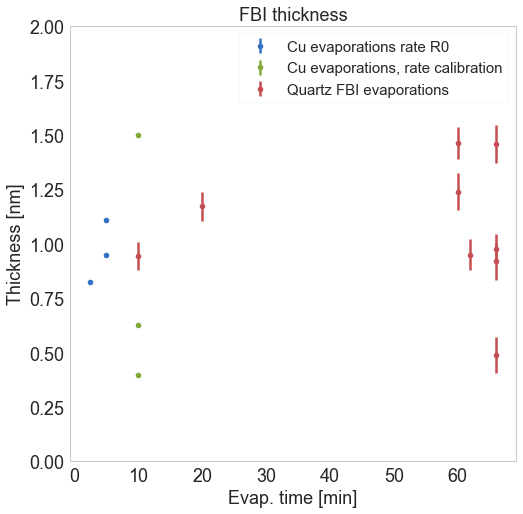

In [229]:
plt.figure(figsize=(8,8))
tsubl = [5, 10, 15, 20, 5, 15, 60, 2.5]
plt.errorbar(x=tsubl, y=thick_cu[:,0], yerr=thick_cu[:,1], fmt='o', label='Cu evaporations rate R0')
tsublR = [10, 10, 10]
plt.errorbar(x=tsublR, y=thick_cu_r[:,0], yerr=thick_cu_r[:,1], fmt='o', label='Cu evaporations, rate calibration')

tsublq = [10, 20, 60, 62, 66, 60, 66, 66, 66]
plt.errorbar(x=tsublq, y=thickm[:,0]/nm, yerr=thickm[:,1]/nm, fmt='o', label='Quartz FBI evaporations')
# plt.errorbar(x=tsublq[4:], y=thickm[4:,0]/nm, yerr=thickm[4:,1]/nm, fmt='o', label='Quartz FBI-Ba evaporations')

# fit = np.polyfit(np.log(tsubl), thickm[:,0], 1)

# xvals = np.arange(2, 60, 0.1)
# fitvals = np.polyval(fit, np.log(xvals)) / nm
# plt.plot(xvals, fitvals, '-', label='Log fit: y = %.2f %.2f log x' %(fit[0]/nm, fit[1]/nm)) 
plt.ylim(0.001, 2)

plt.ylabel('Thickness [nm]')
plt.xlabel('Evap. time [min]')
plt.title('FBI thickness')
plt.legend()

In [58]:
4500*4.5

20250.0

## Refine thickness calculation with N 1s peak growth

$$ I_N = I_{N\infty} \left[ 1 - \exp\left(\frac{-d}{\lambda_{N,N} \cos\theta} \right)\right]  $$

$$ I_{Si} = I_{Si\infty}  \exp\left(\frac{-d}{\lambda_{Si,N} \cos\theta} \right),$$

where $I_{N\infty}$  and $I_{Si\infty}$ are the intensities of pure bulk element of Nitrogen (unknown) and silicon, respectively; $\lambda_{N,N}, \lambda_{Si,N}$ are the Effective Attenuation Lengths (EAL) of the electrons in the material (Nitrogen, proxy of FBI) emitted by the element Si or N (second index). 

Then $d$ can be estimated by solving the equation

$$ \frac{I_N}{I_{Si}} = \frac{ I_{N\infty}[1-\exp[-d/(\lambda_{N,N}\cos\theta)] } { I_{Si\infty}\exp[-d/(\lambda_{Si,N})] } $$

Since we do not know the intesity of pure bulk 
